In [53]:
import pandas as pd
import numpy as np

In [54]:
pokemon = pd.DataFrame({
        'atak': [49, 52, 48, 55, 45],
        'savunma': [49, 43, 65, 40, 160],
        'hız': [45, 65, 43, 90, 70],
        'tür': ['ot', 'ateş', 'su', 'elektrik', 'kaya']
    },
    index=["Bulbasaur", "Charmander", "Squirtle", "Pikachu", "Onix"]
)

pokemon

,atak,savunma,hız,tür
Bulbasaur,49,49,45,ot
Charmander,52,43,65,ateş
Squirtle,48,65,43,su
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya


# Dataframe'leri Değiştirme/Düzenleme
## Satır ekleme
Charmander'in gelişmiş hali olan Charizard'ı da ekleyelim:

In [55]:
pd.concat([pokemon, pd.Series({
    "atak": 104,
    "savunma": 78,
    "tür": "ateş",
    "hız": 100
}, name="Charizad").to_frame().T])

,atak,savunma,hız,tür
Bulbasaur,49,49,45,ot
Charmander,52,43,65,ateş
Squirtle,48,65,43,su
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya
Charizad,104,78,100,ateş


Not: dataframe'e satırı eklemek için kodu: pokemon = pd.concat(...) şekinde yazmamız gerekir.
## Sütunları kullanarak yeni bir sütun oluşturma
Örneğin; atak, savunma ve hız değerlerini toplayıp "toplam güç" adında bir sütuna yazabiliriz:

In [56]:
pokemon["toplam güç"] = pokemon.atak + pokemon.savunma + pokemon.hız
pokemon

,atak,savunma,hız,tür,toplam güç
Bulbasaur,49,49,45,ot,143
Charmander,52,43,65,ateş,160
Squirtle,48,65,43,su,156
Pikachu,55,40,90,elektrik,185
Onix,45,160,70,kaya,275


Ya da "atak/savunma" oranını yani bir pokemonun ne kadar atak yapmaya yönelik olduğunu (saldırganlık) bulabiliriz:

In [57]:
pokemon["saldırganlık"] = pokemon.atak / pokemon.savunma
pokemon

,atak,savunma,hız,tür,toplam güç,saldırganlık
Bulbasaur,49,49,45,ot,143,1.000000
Charmander,52,43,65,ateş,160,1.209302
Squirtle,48,65,43,su,156,0.738462
Pikachu,55,40,90,elektrik,185,1.375000
Onix,45,160,70,kaya,275,0.281250


Şu anda yaptığımız işlem, veri analizi için önemli bir işlemdi. Pokemonların atak/savunma oranları bize önemli bir bilgi veriyor. Saldırganlık değerlerine baktığımızda en az saldırgan olan pokemonun Onix olduğunu görüyoruz ki bu pokemon kaya türü olan ve tam bir savunma pokemonu. Squirtle da kaplumbağaya benzeyen bir pokemon ve savunmaya meyilli. Atak pokemonları olarak ise Charmander'ı ve özellikle Pikachu'yu görüyoruz. Evet, Pikachu'nun atağı güçlü ancak savunması zayıf.

### İstatistiksel bilgi edinmek
NumPy array'lerde yapabileceğimiz istatistiksel hesaplamaları aynı şekilde dataframe ya da serilerde de yapabiliriz. Önceden gördüğümüz gibi ".describe()" metodu ile sayısal sütunların istatistiksel bilgisini edinebiliriz.

# Dışarıdan Veri Okuma
Pandas kullanarak CSV, Excel, JSON gibi dosyaları okuyabilir ve dataframe'lere yükleyebiliriz. Pandas ile en çok CSV dosyaları kullanılır. "Comma Separated Values" yani "virgül ile ayrılmış değerler" anlamına gelir. Verideki her değer birer virgül ile, her satır ise birer satır sonu ile ayrılmıştır. Örneğin; aşağıda bitcoin'in zamana göre değerlerini içeren bir CSV verisi örneği var:

```
2017-04-02 00:00:00,1099.169125
2017-04-03 00:00:00,1141.813
```

Bazı CSV verilerinde ilk satırda sütunların hangi bilgileri içerdiği yazabilir:

```
zaman,değer
2017-04-02 00:00:00,1099.169125
2017-04-03 00:00:00,1141.813
```

Biz "btc-market-price.csv" adlı zamana bağlı bitcoin fiyatlarını gösteren bir veriyi inceleyeceğiz.

Dosyanın konumunu "pd.read_csv" fonksiyonuna parametre olarak girerek CSV dosyasını bir Dataframe şeklinde okuyabiliriz:

In [58]:
df = pd.read_csv("btc-market-price.csv")
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


Veriyi okuduk, her satıra birer indeks verildi ancak bu veride ilk satırda sütun isimleri yoktu. Yukarıda ilk satırın sütun isimleri olarak alındığını görebiliriz. Bunu şöyle düzeltebiliriz:

In [59]:
df = pd.read_csv("btc-market-price.csv", header=None)
df.columns = ["zaman", "değer"]
df.head()

,zaman,değer
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Zaman değerlerini string olarak değil de Datetime objesi şeklinde kullanabiliriz. "pd.to_datetime" metodu ile Datetime'a yani zaman objesine dönüştürebiliriz:

In [60]:
df.zaman = pd.to_datetime(df.zaman)
df.zaman.head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: zaman, dtype: datetime64[ns]

In [61]:
df.set_index("zaman", inplace=True)
df.head()

,değer
zaman,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [62]:
df.loc["2017-04-04"]

değer    1141.600363
Name: 2017-04-04 00:00:00, dtype: float64

## Veriyi Görselleştirme
Pandas, Matplotlib ile entegredir ve görselleştirmeyi kolaylaştırır. Örneğin, zamana göre bitcoin değerlerini çizgi grafiği olarak gösterelim:

<AxesSubplot:xlabel='zaman'>

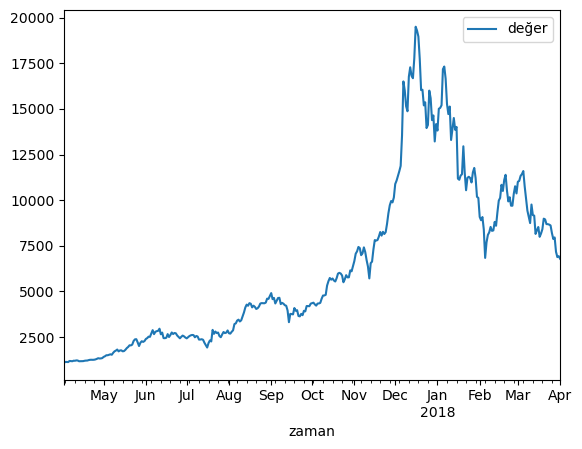

In [64]:
df.plot()

Gördüğümüz gibi kendisi grafiği çizdi ve zamanları da aylara ayırdı.

Matplotlib'in pyplot arayüzünü kullanarak da grafik çizebiliriz:

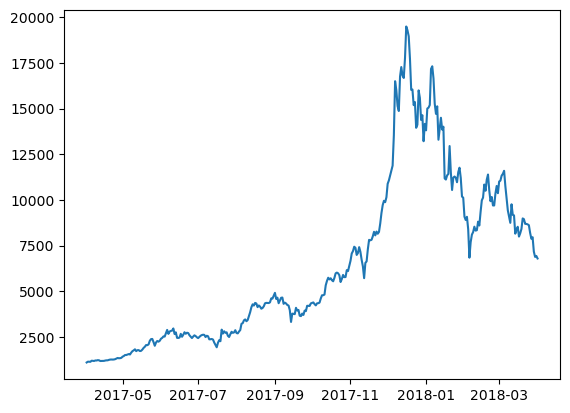

In [65]:
import matplotlib.pyplot as plt

plt.plot(df.index, df["değer"])